## Study a Spin Glass Hamiltonian in terms of Energy spectra, DFT-Functional and Correlations

#### Imports

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from src.graph_utils import create_random_coupling_graph

#### Parameters

In [2]:
n_sites=16
average_coupling=4

#### Create the Random Graph

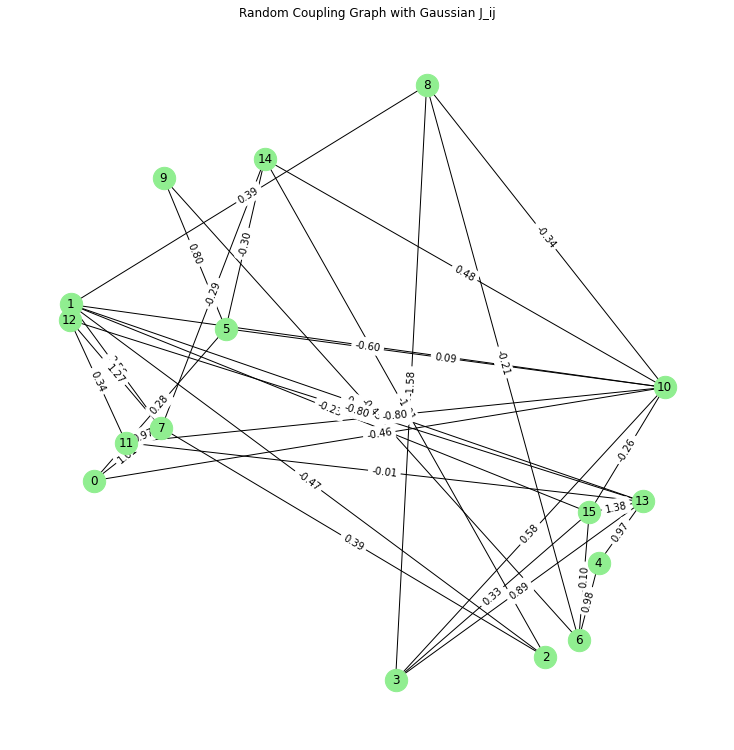

In [3]:
graph=create_random_coupling_graph(num_nodes=n_sites,edge_prob=average_coupling/n_sites,seed=42,)
plt.figure(figsize=(10,10))
pos = nx.spring_layout(graph)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw(graph, pos, with_labels=True, node_color='lightgreen', node_size=500)
nx.draw_networkx_edge_labels(graph, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()})
plt.title("Random Coupling Graph with Gaussian J_ij")
plt.show()

#### Get the adjacency matrix

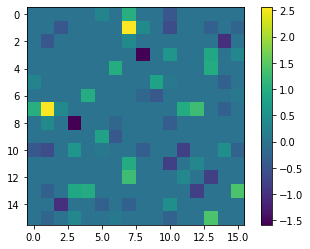

In [4]:
couplings = nx.to_numpy_array(graph, weight='weight') 

plt.imshow(couplings)
plt.colorbar()
plt.show()

#### Build-up the spin glass Hamiltonian using Qutip

In [5]:
from ManyBodySystemQutip.qutip_class import SpinHamiltonian,SpinOperator

dict_couplings={}
index=[]
values=[]
for a in range(n_sites):
    for b in range(n_sites):
        if couplings[a,b]!=0:
            dict_couplings[(a,b)]=couplings[a,b]
            index.append(('z',a,'z',b))
            values.append(couplings[a,b])

In [6]:
j_hamiltonian=SpinOperator(index=index,coupling=values,size=n_sites)

print(j_hamiltonian)

h_hamiltonian=SpinOperator(index=[('x',i) for i in range(n_sites)],coupling=[1]*n_sites,size=n_sites)

omega_hamiltonian=SpinOperator(index=[('z',i) for i in range(n_sites)],coupling=[0.1]*n_sites,size=n_sites)


print(h_hamiltonian)

(couplings, operator) -> 
 ( 0.2790412922001377 ,  ('z', 0, 'z', 5) ) 
 ( 1.0105152848065264 ,  ('z', 0, 'z', 7) ) 
 ( -0.46341769281246226 ,  ('z', 0, 'z', 10) ) 
 ( -0.46572975357025687 ,  ('z', 1, 'z', 2) ) 
 ( 2.5594880310377928 ,  ('z', 1, 'z', 7) ) 
 ( 0.3942330218796011 ,  ('z', 1, 'z', 8) ) 
 ( -0.600638689918805 ,  ('z', 1, 'z', 10) ) 
 ( -0.2916937497932768 ,  ('z', 1, 'z', 13) ) 
 ( -0.22945045383195653 ,  ('z', 1, 'z', 15) ) 
 ( -0.46572975357025687 ,  ('z', 2, 'z', 1) ) 
 ( 0.38934891325612325 ,  ('z', 2, 'z', 7) ) 
 ( -1.0090853428651076 ,  ('z', 2, 'z', 14) ) 
 ( -1.5832942135368875 ,  ('z', 3, 'z', 8) ) 
 ( 0.5821227947130392 ,  ('z', 3, 'z', 10) ) 
 ( 0.8877484595933572 ,  ('z', 3, 'z', 13) ) 
 ( 0.33126343140356396 ,  ('z', 3, 'z', 15) ) 
 ( 0.9755451271223592 ,  ('z', 4, 'z', 6) ) 
 ( 0.9729635337557875 ,  ('z', 4, 'z', 13) ) 
 ( 0.2790412922001377 ,  ('z', 5, 'z', 0) ) 
 ( 0.7955954638959417 ,  ('z', 5, 'z', 9) ) 
 ( 0.08704706823817122 ,  ('z', 5, 'z', 10) ) 
 ( -0

In [7]:
tot_hamiltonian=j_hamiltonian.qutip_op+h_hamiltonian.qutip_op+omega_hamiltonian.qutip_op

print(tot_hamiltonian)

Quantum object: dims=[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]], shape=(65536, 65536), type='oper', dtype=CSR, isherm=True
Qobj data =
  (np.int32(0), np.int32(0))	(13.038861614645198+0j)
  (np.int32(0), np.int32(1))	(1+0j)
  (np.int32(0), np.int32(2))	(1+0j)
  (np.int32(0), np.int32(4))	(1+0j)
  (np.int32(0), np.int32(8))	(1+0j)
  (np.int32(0), np.int32(16))	(1+0j)
  (np.int32(0), np.int32(32))	(1+0j)
  (np.int32(0), np.int32(64))	(1+0j)
  (np.int32(0), np.int32(128))	(1+0j)
  (np.int32(0), np.int32(256))	(1+0j)
  (np.int32(0), np.int32(512))	(1+0j)
  (np.int32(0), np.int32(1024))	(1+0j)
  (np.int32(0), np.int32(2048))	(1+0j)
  (np.int32(0), np.int32(4096))	(1+0j)
  (np.int32(0), np.int32(8192))	(1+0j)
  (np.int32(0), np.int32(16384))	(1+0j)
  (np.int32(0), np.int32(32768))	(1+0j)
  (np.int32(1), np.int32(0))	(1+0j)
  (np.int32(1), np.int32(1))	(7.543351210191456+0j)
  (np.int32(1), np.int32(3))	(1+0j)
  (np.int32(1), np.int32(

In [8]:
from scipy.sparse.linalg import eigsh
tot_hamiltonian_sparse=tot_hamiltonian.data.as_scipy()




es,psis=eigsh(tot_hamiltonian_sparse,k=1,which='SA')


In [9]:
print(es)

[-36.85247544]
